In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

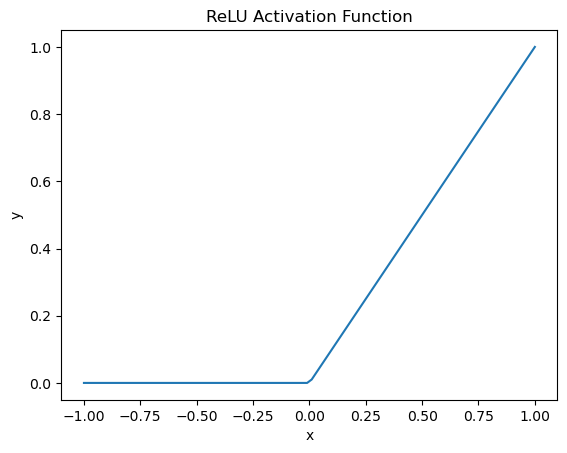

In [2]:
x = np.linspace(-1, 1, 100)
y = np.maximum(0, x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("ReLU Activation Function")
plt.savefig("Figure_7.png")

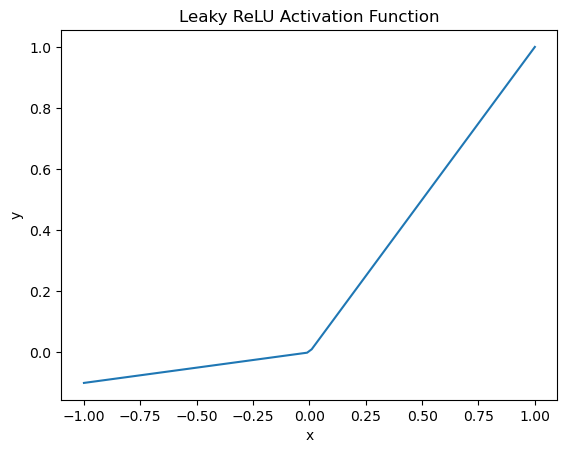

In [11]:
x = np.linspace(-1, 1, 100)
y = np.maximum(0.1*x, x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Leaky ReLU Activation Function")
plt.savefig("Figure_8.png")

In [9]:
from torchvision.datasets import MNIST

In [10]:
# init with the 'data' dir
mnist_trainset = MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = MNIST(root='./data', train=False, download=True, transform=None)

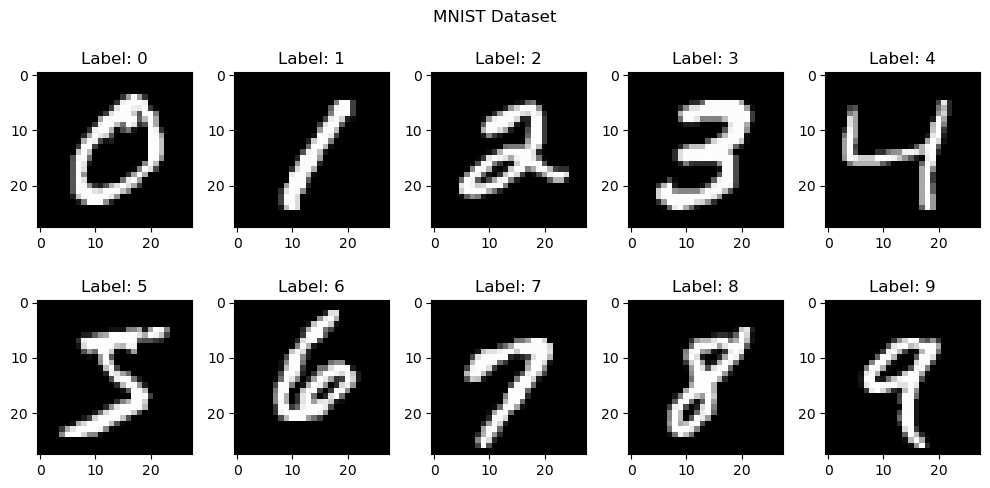

In [5]:
xs = [None]*10
idxs = np.arange(10)
for i, (x, y) in enumerate(mnist_trainset):
    x = np.array(x)

    if np.isin(y, idxs):
        xs[y] = x
        idxs = np.delete(idxs, np.where(idxs == y))

    if len(idxs) == 0:
        break
xs = np.array(xs)

fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(xs[i], cmap='gray')
    ax.set_title(f"Label: {i}")

plt.suptitle("MNIST Dataset")
plt.tight_layout()
plt.savefig("Figure_9.png")

In [11]:
train_x = mnist_trainset.data.numpy() / 255.0
train_y = mnist_trainset.targets.numpy()
test_x = mnist_testset.data.numpy() / 255.0
test_y = mnist_testset.targets.numpy()

In [12]:
print(train_x.min(), train_x.max(), train_x.mean())
print(train_y.min(), train_y.max(), train_y.mean())
print(test_x.min(), test_x.max(), test_x.mean())
print(test_y.min(), test_y.max(), test_y.mean())

0.0 1.0 0.1306604762738429
0 9 4.4539333333333335
0.0 1.0 0.13251460584233699
0 9 4.4434


In [13]:
print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

(60000, 28, 28) float64
(60000,) int64
(10000, 28, 28) float64
(10000,) int64


In [30]:
x = train_x[2]

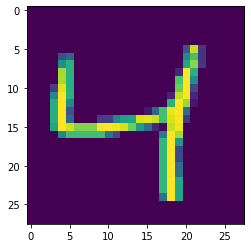

In [31]:
plt.imshow(x)

In [32]:
import cv2

In [48]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

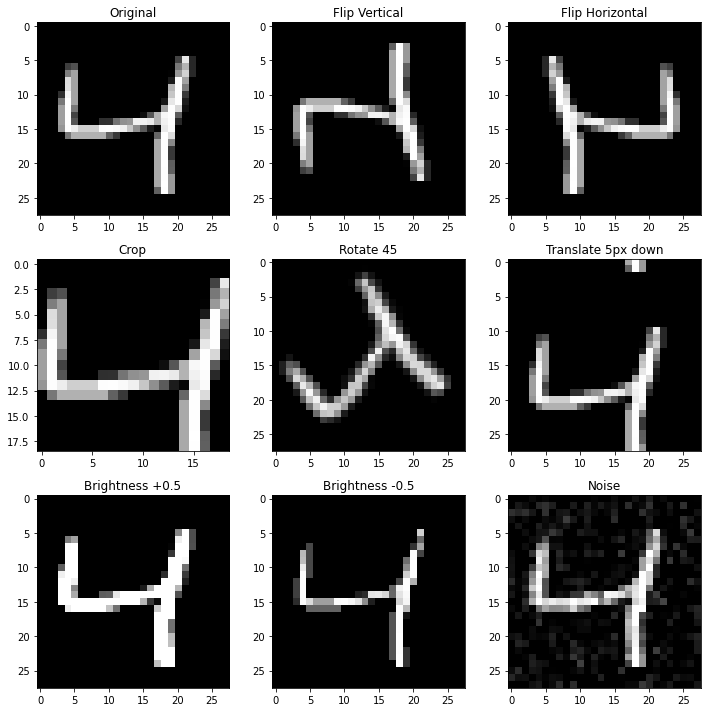

In [51]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# original
axs[0, 0].imshow(x, cmap='gray')
axs[0, 0].set_title("Original")

# flip
axs[0, 1].imshow(cv2.flip(x, 0), cmap='gray')
axs[0, 1].set_title("Flip Vertical")
axs[0, 2].imshow(cv2.flip(x, 1), cmap='gray')
axs[0, 2].set_title("Flip Horizontal")

# crop
axs[1, 0].imshow(x[3:-6, 3:-6], cmap='gray')
axs[1, 0].set_title("Crop")

# rotate at an angle
axs[1, 1].imshow(rotate_image(x, 45), cmap='gray')
axs[1, 1].set_title("Rotate 45")

# translate
axs[1, 2].imshow(np.roll(x, 5, axis=0), cmap='gray')
axs[1, 2].set_title("Translate 5px down")

# adjust brightness
axs[2, 0].imshow(np.clip(x + 0.5, 0, 1), cmap='gray')
axs[2, 0].set_title("Brightness +0.5")
axs[2, 1].imshow(np.clip(x - 0.5, 0, 1), cmap='gray')
axs[2, 1].set_title("Brightness -0.5")

# noise
axs[2, 2].imshow(np.clip(x + np.random.normal(0, 0.1, x.shape), 0, 1), cmap='gray')
axs[2, 2].set_title("Noise")

plt.tight_layout()
plt.savefig("Figure_15.png")
plt.show()

In [8]:
train_idxs = np.argsort(train_y)
train_x = train_x[train_idxs]
train_y = train_y[train_idxs]

idxs = np.argsort(test_y)
test_x = test_x[idxs]
test_y = test_y[idxs]

NameError: name 'train_y' is not defined

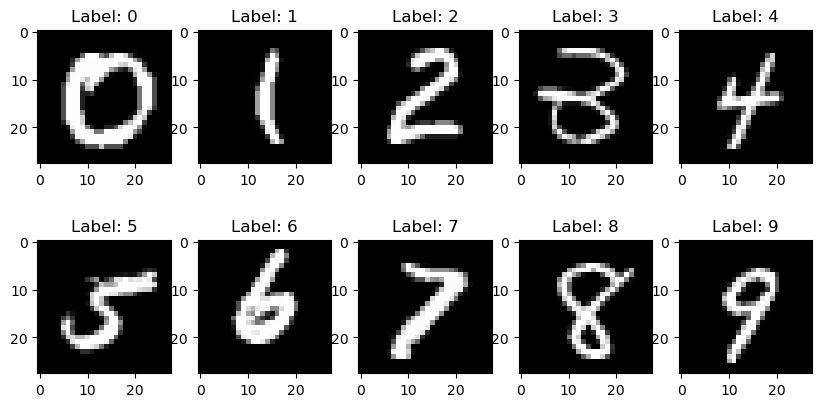

In [76]:
# Plot samples by picking random indices from each class
from IPython.display import clear_output
import time

fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for j in range(20):
    clear_output(wait=True)
    for i, ax in enumerate(axs.flatten()):
        class_idxs = np.where(train_y == i)[0]
        idx = np.random.choice(class_idxs)
        ax.imshow(train_x[idx], cmap='gray')
        ax.set_title(f"Label: {train_y[idx]}")
    plt.show()
    time.sleep(1)
    clear_output(wait=True)
    plt.show()


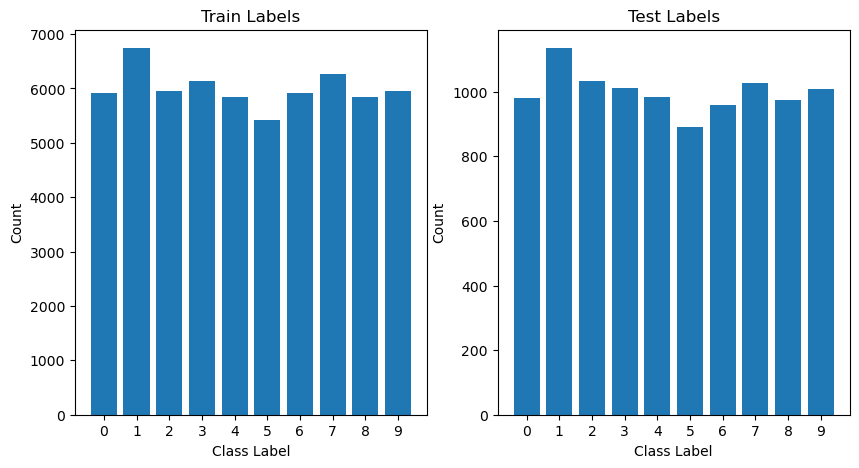

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
train_counts = np.unique(train_y, return_counts=True)
axs[0].bar(train_counts[0], train_counts[1])
axs[0].set_xticks(np.arange(10))
axs[0].set_xlabel("Class Label")
axs[0].set_ylabel("Count")
axs[0].set_title("Train Labels")

test_counts = np.unique(test_y, return_counts=True)
axs[1].bar(test_counts[0], test_counts[1])
axs[1].set_xticks(np.arange(10))
axs[1].set_xlabel("Class Label")
axs[1].set_ylabel("Count")
axs[1].set_title("Test Labels")

plt.savefig("Figure_10.png")

In [62]:
class DNN():
    def __init__(self, layers=4, hidden_dim=128, lr=0.001):
        self.layers = layers
        self.hidden_dim = hidden_dim
        self.lr = lr

        self.params = {}
        self.grads = {}
        self.cache = {}
        
        self._init_params()

    def _init_params(self):
        self.params['W1'] = np.random.randn(784, self.hidden_dim) * 0.01
        self.params['b1'] = np.zeros(self.hidden_dim)
        for i in range(2, self.layers):
            self.params[f'W{i}'] = np.random.randn(self.hidden_dim, self.hidden_dim) * 0.01
            self.params[f'b{i}'] = np.zeros(self.hidden_dim)
        self.params[f'W{self.layers}'] = np.random.randn(self.hidden_dim, 10) * 0.01
        self.params[f'b{self.layers}'] = np.zeros(10)

    def _relu(self, x):
        return np.maximum(0, x)

    def _softmax(self, x):
        exp = np.exp(x - np.max(x)) # for numerical stability
        denom = np.sum(exp, axis=1, keepdims=True)
        
        return exp / denom

    def _cross_entropy(self, y, y_hat):
        return -np.sum(y * np.log(y_hat + 1e-7)) / y.shape[0]

    def _forward(self, x):
        self.cache['A0'] = x
        for i in range(1, self.layers):
            self.cache[f'Z{i}'] = np.dot(self.cache[f'A{i-1}'], self.params[f'W{i}']) + self.params[f'b{i}']
            self.cache[f'A{i}'] = self._relu(self.cache[f'Z{i}'])
        self.cache[f'Z{self.layers}'] = np.dot(self.cache[f'A{self.layers-1}'], self.params[f'W{self.layers}']) + self.params[f'b{self.layers}']
        self.cache[f'A{self.layers}'] = self._softmax(self.cache[f'Z{self.layers}'])
    
        return self.cache[f'A{self.layers}']

    def _backward(self, y):
        self.grads[f'dZ{self.layers}'] = self.cache[f'A{self.layers}'] - y
        self.grads[f'dW{self.layers}'] = np.dot(self.cache[f'A{self.layers-1}'].T, self.grads[f'dZ{self.layers}'])
        self.grads[f'db{self.layers}'] = np.sum(self.grads[f'dZ{self.layers}'], axis=0)
        for i in range(self.layers-1, 0, -1):
            self.grads[f'dA{i}'] = np.dot(self.grads[f'dZ{i+1}'], self.params[f'W{i+1}'].T)
            self.grads[f'dZ{i}'] = self.grads[f'dA{i}'] * (self.cache[f'Z{i}'] > 0).astype(np.float32)
            self.grads[f'dW{i}'] = np.dot(self.cache[f'A{i-1}'].T, self.grads[f'dZ{i}'])
            self.grads[f'db{i}'] = np.sum(self.grads[f'dZ{i}'], axis=0)

    def _update(self):
        for i in range(1, self.layers+1):
            self.params[f'W{i}'] -= self.lr * self.grads[f'dW{i}'] / self.b # batch size
            self.params[f'b{i}'] -= self.lr * self.grads[f'db{i}'] / self.b # batch size

    def step(self, x, y):
        self.b = x.shape[0]
        y_hat = self._forward(x)
        loss = self._cross_entropy(y, y_hat)
        self._backward(y)
        self._update()

        return loss

    def predict(self, x):
        return np.argmax(self._forward(x), axis=1)

    def evaluate(self, x, y):
        y_hat = self._forward(x)
        loss = self._cross_entropy(y, y_hat)
        accuracy = np.mean(np.argmax(y_hat, axis=1) == np.argmax(y, axis=1))

        return loss, accuracy


In [66]:
dnn = DNN(layers=4, hidden_dim=128, lr=0.1)

In [67]:
batch_size = 60

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(100):
    rand_idxs = np.random.permutation(train_x.shape[0])

    for i in range(0, train_x.shape[0], batch_size):
        batch_idxs = rand_idxs[i:i+batch_size]
        x = train_x[batch_idxs].reshape(batch_size, -1) # reshape H x W to one dimension
        y = np.eye(10)[train_y[batch_idxs]] # one hot encoding
        loss = dnn.step(x, y)

    train_loss, train_accuracy = dnn.evaluate(train_x.reshape(train_x.shape[0], -1), np.eye(10)[train_y])
    test_loss, test_accuracy = dnn.evaluate(test_x.reshape(test_x.shape[0], -1), np.eye(10)[test_y])

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_accuracy:.5f}")
    print(f"Epoch: {epoch+1} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_accuracy:.5f}")

Epoch: 1 | Train Loss: 2.30122 | Train Accuracy: 0.11237
Epoch: 1 | Test Loss: 2.30131 | Test Accuracy: 0.11350
Epoch: 2 | Train Loss: 1.02237 | Train Accuracy: 0.64242
Epoch: 2 | Test Loss: 1.01126 | Test Accuracy: 0.64860
Epoch: 3 | Train Loss: 0.25027 | Train Accuracy: 0.93082
Epoch: 3 | Test Loss: 0.25587 | Test Accuracy: 0.92870
Epoch: 4 | Train Loss: 0.15791 | Train Accuracy: 0.95593
Epoch: 4 | Test Loss: 0.17577 | Test Accuracy: 0.95210
Epoch: 5 | Train Loss: 0.11114 | Train Accuracy: 0.96770
Epoch: 5 | Test Loss: 0.14218 | Test Accuracy: 0.96040
Epoch: 6 | Train Loss: 0.08356 | Train Accuracy: 0.97620
Epoch: 6 | Test Loss: 0.12333 | Test Accuracy: 0.96820
Epoch: 7 | Train Loss: 0.07430 | Train Accuracy: 0.97785
Epoch: 7 | Test Loss: 0.12033 | Test Accuracy: 0.96760
Epoch: 8 | Train Loss: 0.05244 | Train Accuracy: 0.98493
Epoch: 8 | Test Loss: 0.10266 | Test Accuracy: 0.97310
Epoch: 9 | Train Loss: 0.05194 | Train Accuracy: 0.98383
Epoch: 9 | Test Loss: 0.11212 | Test Accuracy: 

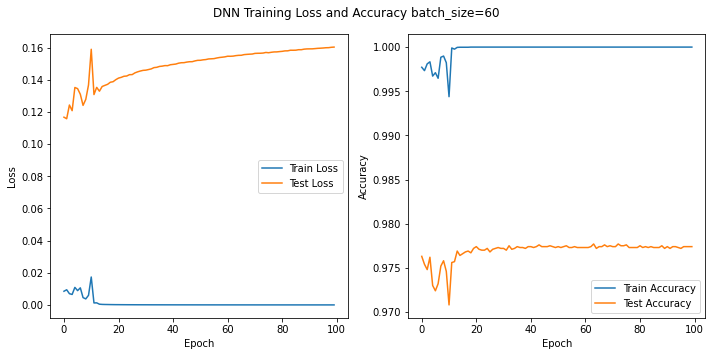

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(train_losses, label="Train Loss")
axs[0].plot(test_losses, label="Test Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(train_accuracies, label="Train Accuracy")
axs[1].plot(test_accuracies, label="Test Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
plt.suptitle("DNN Training Loss and Accuracy batch_size=60")

plt.tight_layout()
plt.savefig("Figure_11.png")
plt.show()

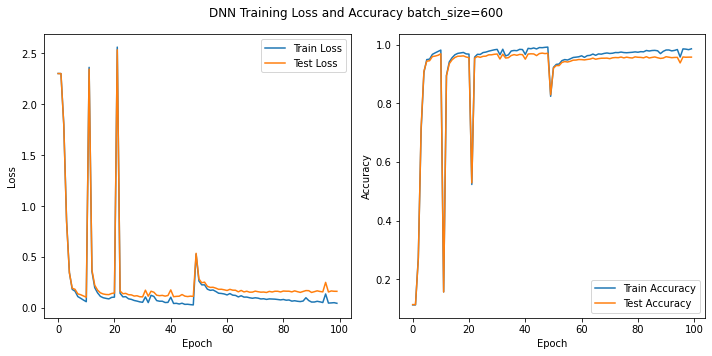

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(train_losses, label="Train Loss")
axs[0].plot(test_losses, label="Test Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(train_accuracies, label="Train Accuracy")
axs[1].plot(test_accuracies, label="Test Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
plt.suptitle(f"DNN Training Loss and Accuracy batch_size={batch_size}")

plt.tight_layout()
plt.savefig("Figure_12.jpg")
plt.show()

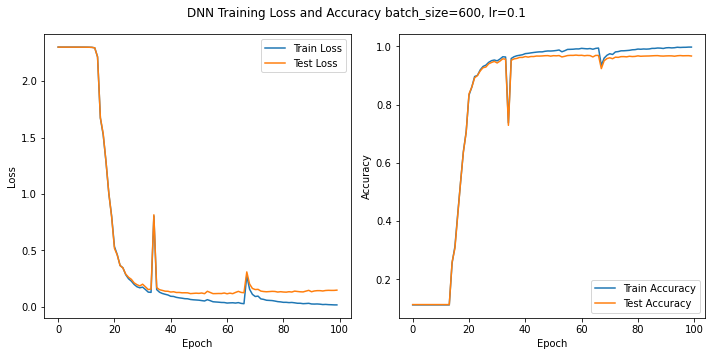

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(train_losses, label="Train Loss")
axs[0].plot(test_losses, label="Test Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(train_accuracies, label="Train Accuracy")
axs[1].plot(test_accuracies, label="Test Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
plt.suptitle(f"DNN Training Loss and Accuracy batch_size={batch_size}, lr={dnn.lr}")

plt.tight_layout()
plt.savefig("Figure_13.jpg")
plt.show()

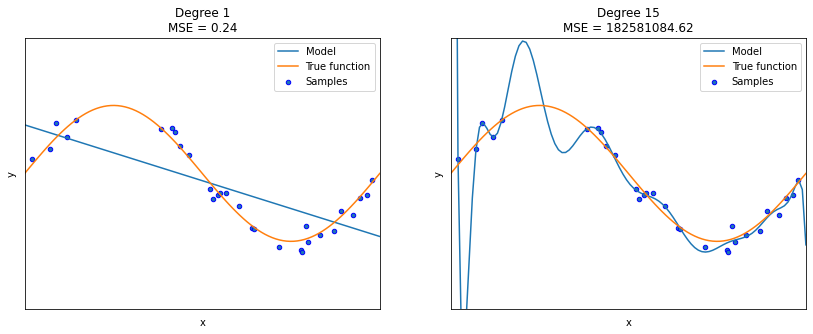

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create synthetic data
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1

X = X[:, np.newaxis]
y = y[:, np.newaxis]

# Create models
degrees = [1, 15]

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial_features, linear_regression)
    pipeline.fit(X, y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, np.sin(2 * np.pi * X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2f}".format(degrees[i], -scores.mean()))

plt.savefig("Figure_14.png")
plt.show()